In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import json
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/tweets_1.4.csv", low_memory=False)
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android


In [ ]:
df.shape

(84568, 12)

In [ ]:
df.keys()

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source'],
      dtype='object')

In [ ]:
stoplist = set(stopwords.words("english"))
stoplist.remove('not')

In [ ]:
df['text'] = df['text'].fillna('').apply(str)

In [ ]:
def preprocess_text(df):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    df["processed_text"] = df["text"].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: re.sub(r'@\S+', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: x.lower())
    df["processed_text"] = df["processed_text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df["processed_text"] = df["processed_text"].apply(lambda x: word_tokenize(x))
    df["processed_text"] = df["processed_text"].apply(lambda x: [word for word in x if word not in stoplist])
    return df

In [ ]:
processed_df = preprocess_text(df)

In [ ]:
processed_df.head(5)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"[asked, chatgpt, one, incredible, facts, universe, chatgpt]"
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"[watch, agile, teachers, lounge, amp, join, conversation, chatgpt, classroom, join, conversation, let, us, know, thoughts, edutwitter, edchat]"
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"[heart, selling, according, chatgpt, not, bad, though, little, long, pretty, complete, accurate, heartselling, ai, makefriends]"
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"[thanks, check, website, great, collection, preselected, moneymaking, prompts, easily, copied, pasted, chatgpt, generate, income]"
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"[anything, real, original, anymore, chatgpt, aiartwork, yay, nay]"


In [ ]:
from textblob import TextBlob

for index, row in processed_df.iterrows():
    textblob = TextBlob(' '.join(row['processed_text']))
    sentiment = textblob.sentiment.polarity
    if sentiment > 0:
        processed_df.at[index, 'sentiment_label'] = "POSITIVE"
    elif sentiment == 0:
        processed_df.at[index, 'sentiment_label'] = "NEUTRAL"
    else:
        processed_df.at[index, 'sentiment_label'] = "NEGATIVE"
    processed_df.at[index, 'sentiment_score'] = sentiment

In [ ]:
processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"[asked, chatgpt, one, incredible, facts, universe, chatgpt]",POSITIVE,0.900000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"[watch, agile, teachers, lounge, amp, join, conversation, chatgpt, classroom, join, conversation, let, us, know, thoughts, edutwitter, edchat]",POSITIVE,0.500000
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"[heart, selling, according, chatgpt, not, bad, though, little, long, pretty, complete, accurate, heartselling, ai, makefriends]",POSITIVE,0.143750
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"[thanks, check, website, great, collection, preselected, moneymaking, prompts, easily, copied, pasted, chatgpt, generate, income]",POSITIVE,0.477778
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"[anything, real, original, anymore, chatgpt, aiartwork, yay, nay]",POSITIVE,0.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84563,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:10:31+00:00,NaN,Twitter for Android,[],NEUTRAL,0.000000
84564,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:09:22+00:00,['ChatGPT'],Twitter Web App,[],NEUTRAL,0.000000
84565,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:09:04+00:00,['ChatGPT'],Twitter for Android,[],NEUTRAL,0.000000
84566,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-05 17:08:44+00:00,"['ChatGPT', 'GPT3']",Twitter for Android,[],NEUTRAL,0.000000


In [ ]:
processed_df.dropna(subset=["user_name"], inplace=True)
processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredible facts about the universe.... 🤩\n\n#ChatGPT https://t.co/K4CCqS3qSX,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n\nIch tweete hauptsächlich über Astronomie, Wissenschaft und ab und zu über #Bitcoin!",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18 17:48:20+00:00,['ChatGPT'],Twitter Web App,"[asked, chatgpt, one, incredible, facts, universe, chatgpt]",POSITIVE,0.900000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join the conversation about #ChatGPT in the #classroom. \n\nJoin the conversation and let us know your thoughts! \n\nhttps://t.co/jBK0E8lo0u\n\n#edutwitter #edchat https://t.co/E7aEybs9nK,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover, Mom, #Runner, Book Worm",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18 17:48:12+00:00,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"[watch, agile, teachers, lounge, amp, join, conversation, chatgpt, classroom, join, conversation, let, us, know, thoughts, edutwitter, edchat]",POSITIVE,0.500000
2,Heart Selling,"What is Heart Selling according to #ChatGPT.\nNot bad, though a little long but pretty complete and accurate \n#heartselling #ai #makefriends https://t.co/pntaNOTFOq","Zeist, Nederland",In turbulent times: Make #friends! De Sales Experts voor Menselijk Verkopen (Sinds 1998) #makefriends #loveresults,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18 17:48:12+00:00,['ChatGPT'],Twitter for Android,"[heart, selling, according, chatgpt, not, bad, though, little, long, pretty, complete, accurate, heartselling, ai, makefriends]",POSITIVE,0.143750
3,CryptoRock,"@sulamatraore You should thanks to check out this website, https://t.co/GIN65QfmQy which has a great collection of preselected money-making prompts that can be easily copied and pasted into #ChatGPT to generate income",NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18 17:48:10+00:00,NaN,Twitter Web App,"[thanks, check, website, great, collection, preselected, moneymaking, prompts, easily, copied, pasted, chatgpt, generate, income]",POSITIVE,0.477778
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\n#ChatGPT #AIArtwork \nYay or nay ?,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #NftArt 🎨 \n#NftCommunity🫂\n#Octolites👾\n#irlgallery\n https://t.co/6ErQGgnHit\n#SpacesHost,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18 17:48:09+00:00,"['ChatGPT', 'AIArtwork']",Twitter for Android,"[anything, real, original, anymore, chatgpt, aiartwork, yay, nay]",POSITIVE,0.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84547,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for com8ng up with such a revolutionary idea.The FUTURE LOOKS BRIGHT.\n\n#ChatGPT https://t.co/1QOKv6YLwA",Satoshi Island,Blockchain Enthusiast || Philanthropist || a SLAVE OF JAVASCRIPT and SOLIDITY 💥 Blockchain and web developer||\nFx and stock trader||\n\nA KINGDOM CITIZEN,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659.0,False,2022-12-05 17:15:00+00:00,['ChatGPT'],Twitter for Android,"[levelsso, happy, chatgpt, team, com8ng, revolutionary, ideathe, future, looks, bright, chatgpt]",POSITIVE,0.500000
84548,Green,"Iterating back-and-forth with tools like #ChatGPT will probably change how we use computers forever. Here's a ""conversation"" I had earlier as an example designing a simple video game UI. https://t.co/ZUTLcCLScS",🍁,NaN,2022-12-03 12:49:13+00:00,3.0,33.0,3.0,False,2022-12-05 17:14:45+00:00,NaN,Twitter Web App,"[iterating, backandforth, tools, like, chatgpt, probably, change, use, computers, forever, heres, conversation, earlier, example, designing, simple, video, game, ui]",NEGATIVE,-0.133333
84549,Gabri

In [ ]:
# !pip install geopy
# import spacy
# from geopy.geocoders import Nominatim

# nlp = spacy.load("en_core_web_sm")
# geolocator = Nominatim(user_agent="geoapiExercises")

# def find_country(city):
#     doc = nlp(str(city))
#     for ent in doc.ents:
#         if ent.label_ == "GPE":
#             city = ent.text
#             break
#     location = geolocator.geocode(city, timeout=10)
#     if location:
#         return location.address.split(',')[-1]
#     else:
#         return None

# city = "Faridabad"
# print(find_country(city))

In [ ]:
# processed_df['user_country'] = processed_df['user_location'].apply(find_country)
# #NOT WORKING BECAUSE IT THINKS WERE SPAMMING :(

In [ ]:
# Save the updated DataFrame to a CSV file
processed_df.to_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_textblob.csv", index=False)

In [4]:
processed_df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_textblob.csv", low_memory=False)

In [5]:
processed_df.columns

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source', 'processed_text',
       'sentiment_label', 'sentiment_score'],
      dtype='object')

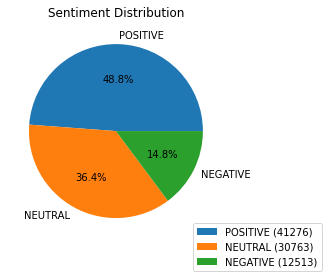

In [6]:
import matplotlib.pyplot as plt

# Count the number of instances of each sentiment label
sentiment_counts = processed_df['sentiment_label'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%')
plt.title("Sentiment Distribution")

# Add the count values to the legend
legend_labels = [f'{label} ({count})' for label, count in sentiment_counts.items()]
plt.legend(legend_labels, bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure)

# Display the chart
plt.show()


In [7]:
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objects as go
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
sentiment_counts = processed_df['sentiment_label'].value_counts()
trace = go.Pie(labels=sentiment_counts.index, values=sentiment_counts, textinfo='label+value+percent')
layout = go.Layout(title="Sentiment Distribution - TextBlob", width=500, height=500)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

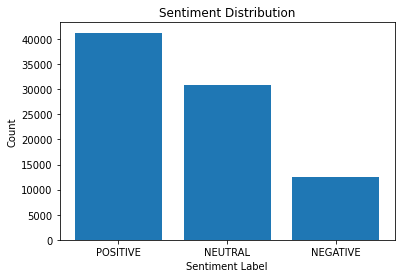

In [9]:
import matplotlib.pyplot as plt

# Create a new DataFrame with the count of each sentiment label
sentiment_count = processed_df['sentiment_label'].value_counts().reset_index()
sentiment_count.columns = ['sentiment_label', 'count']

# Create the bar chart
plt.bar(sentiment_count['sentiment_label'], sentiment_count['count'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [11]:
# processed_df = processed_df.drop(index=23375)

# Convert date column to datetime format
for i, date_value in enumerate(processed_df['date']):
    try:
        pd.to_datetime(date_value)
    except ValueError:
        print("Error in row with index:", i)
        # print(processed_df[i:i+1])

processed_df['date'] = pd.to_datetime(processed_df['date'])

# processed_df['date'] = pd.to_datetime(processed_df['date'], errors = 'raise')

# Remove the timezone offset
# processed_df['date'] = processed_df['date'].dt.tz_localize(None)

# Iterate over the DataFrame
for i, row in processed_df.iterrows():
    try:
        processed_df['date'] = processed_df['date'].dt.tz_convert('UTC')
    except AttributeError as e:
        print(f"Error in row {i}: {row['date']}")

# Extract date only
processed_df['date'] = processed_df['date'].dt.date
processed_df['date'].unique

KeyboardInterrupt: ignored

In [ ]:
processed_df.to_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_textblob_withDate.csv", index=False)

In [3]:
processed_df = pd.read_csv("/content/drive/MyDrive/Geetansh/Data Literacy/sentiment-ChatGPT/data/processed_data_textblob_withDate.csv", low_memory=False)

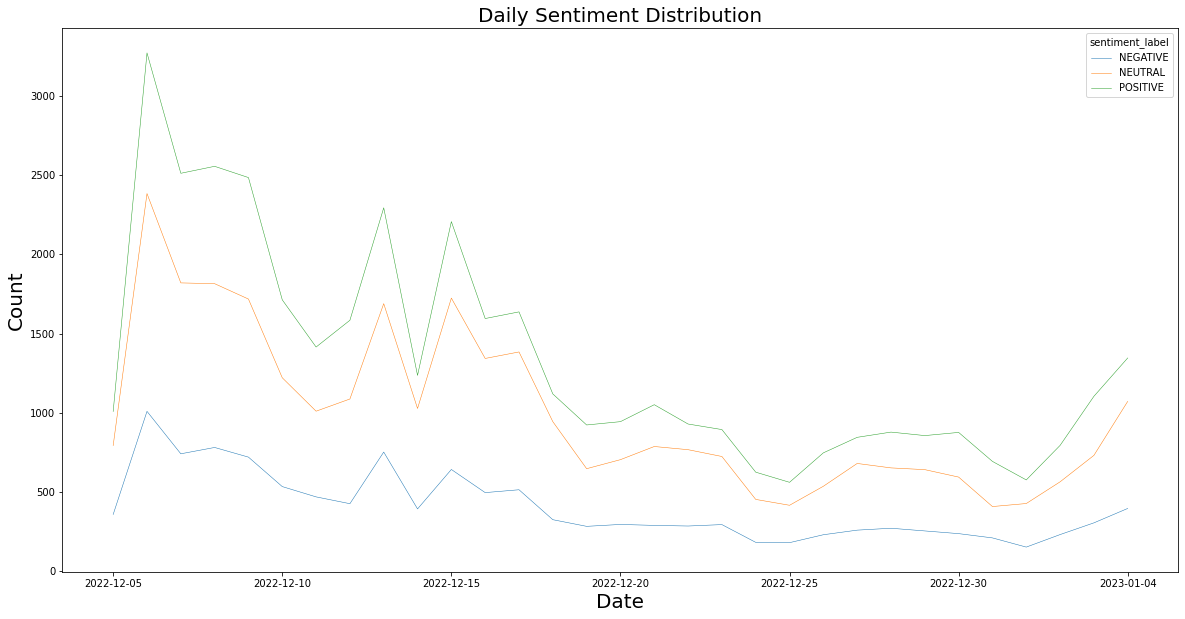

In [13]:
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Fill missing values with 0
daily_sentiment = daily_sentiment.fillna(0)

# Create a new figure and subplots
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the daily sentiment distribution
daily_sentiment.plot(kind='line',ax=ax,linewidth=0.5)
plt.title("Daily Sentiment Distribution",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

In [14]:
processed_df.keys()

Index(['user_name', 'text', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'hashtags', 'source', 'processed_text',
       'sentiment_label', 'sentiment_score'],
      dtype='object')

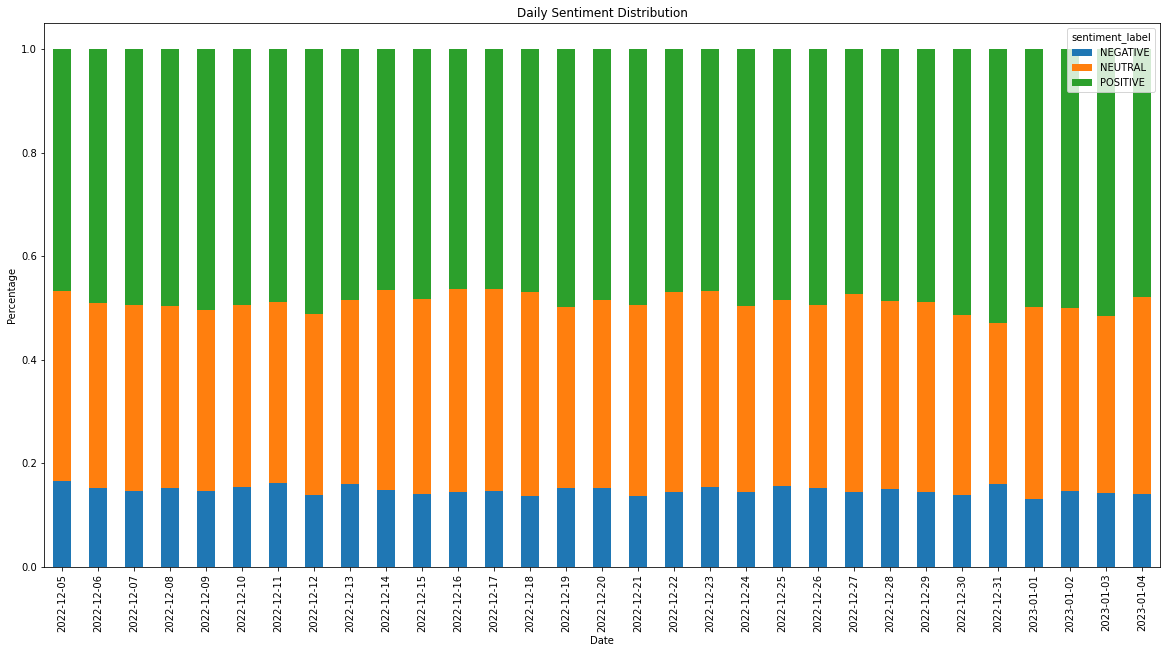

In [15]:
# Create a new DataFrame with the count of each sentiment label for each day
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Calculate the percentages
daily_sentiment = daily_sentiment.divide(daily_sentiment.sum(axis=1), axis=0)

# Plot the daily sentiment distribution
fig, ax = plt.subplots(figsize=(20,10))
# daily_sentiment.plot(kind='bar', stacked=True, ax=ax,autopct='%.1f%%')

daily_sentiment.plot(kind='bar', stacked=True, ax=ax)
plt.title("Daily Sentiment Distribution")
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.show()


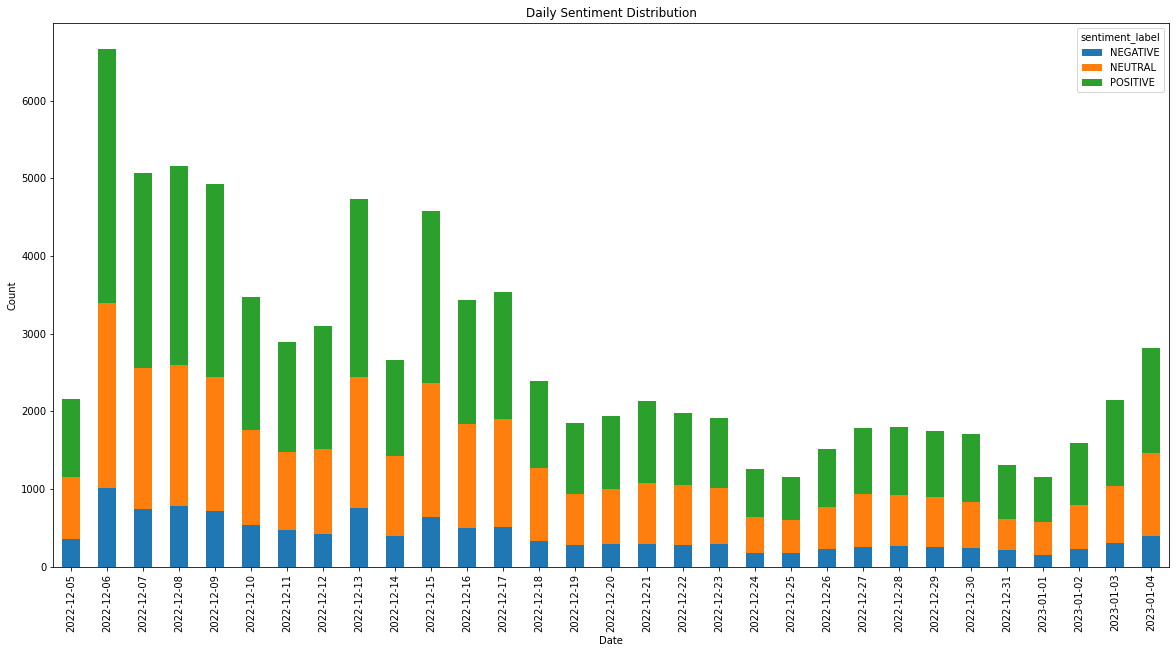

In [16]:
# Create a new DataFrame with the count of each sentiment label for each day
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Plot the daily sentiment distribution
fig, ax = plt.subplots(figsize=(20,10))

daily_sentiment.plot(kind='bar', stacked=True, ax=ax)
plt.title("Daily Sentiment Distribution")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

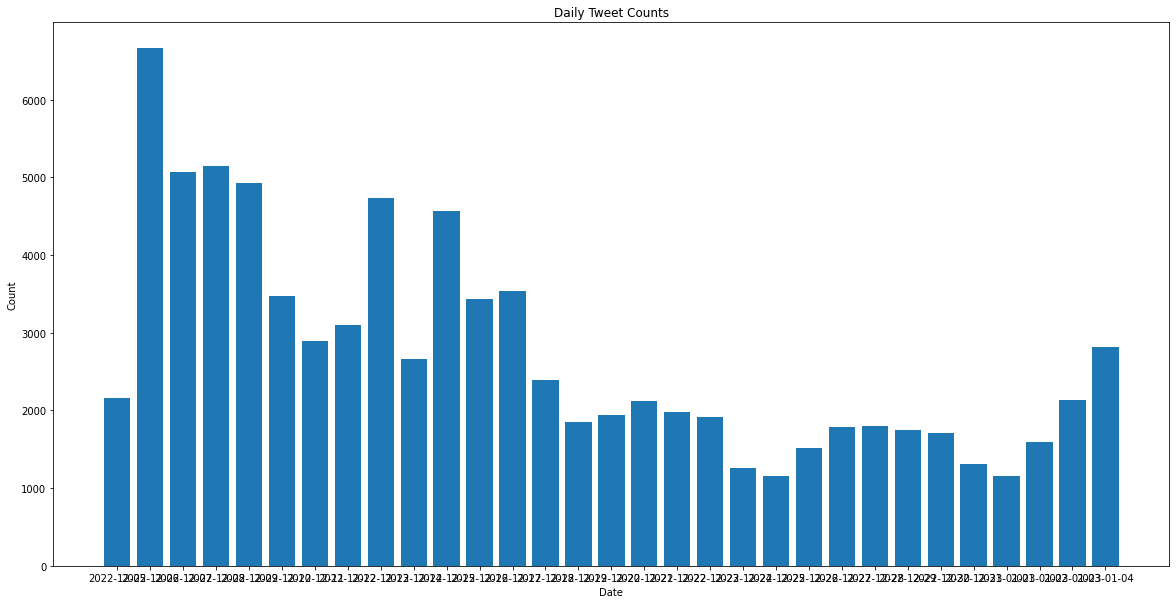

In [17]:
# Count the number of tweets for each day
daily_tweets = processed_df.groupby(['date']).size().reset_index(name='counts')

# Plot the daily tweet counts
plt.figure(figsize=(20,10))


plt.bar(daily_tweets['date'], daily_tweets['counts'])
plt.title("Daily Tweet Counts")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [18]:
import plotly.graph_objects as go
from datetime import datetime

# Create a new DataFrame with the count of each sentiment label for each day
daily_sentiment = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')

# Use pivot_table to reshape the DataFrame 
daily_sentiment = daily_sentiment.pivot(index='date',columns='sentiment_label',values='counts')

# Get list of dates and formatted date strings for tickvals and ticktext
dates = daily_sentiment.index.tolist()
datetime_dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
formatted_dates = [d.strftime("%Y-%m-%d") for d in datetime_dates]

# Plot the daily sentiment distribution
data = []
for col in daily_sentiment.columns:
    data.append(go.Bar(x=daily_sentiment.index, y=daily_sentiment[col], name=col))

layout = go.Layout(title="Daily Sentiment Distribution - TextBlob",
                   xaxis=dict(tickmode='array', tickvals=datetime_dates, ticktext=formatted_dates),
                   yaxis=dict(title='Count'),
                  )
fig = go.Figure(data=data, layout=layout)
fig.show()


In [19]:
import math

In [20]:
for i, value in enumerate(processed_df['processed_text']):
    if isinstance(value, float) and math.isnan(value):
        processed_df.at[i, 'processed_text'] = ""

In [21]:
processed_df['processed_text'] = processed_df['processed_text'].apply(lambda x: x.replace('chatgpt',''))
processed_text = [word for word in processed_df['processed_text'] if word.isalnum() and len(word) > 1]

processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredib...,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n...",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18,['ChatGPT'],Twitter Web App,"['asked', '', 'one', 'incredible', 'facts', 'u...",POSITIVE,0.900000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join th...,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover,...",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"['watch', 'agile', 'teachers', 'lounge', 'amp'...",POSITIVE,0.500000
2,Heart Selling,What is Heart Selling according to #ChatGPT.\n...,"Zeist, Nederland",In turbulent times: Make #friends! De Sales Ex...,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18,['ChatGPT'],Twitter for Android,"['heart', 'selling', 'according', '', 'not', '...",POSITIVE,0.143750
3,CryptoRock,@sulamatraore You should thanks to check out t...,NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18,NaN,Twitter Web App,"['thanks', 'check', 'website', 'great', 'colle...",POSITIVE,0.477778
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\...,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #N...,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18,"['ChatGPT', 'AIArtwork']",Twitter for Android,"['anything', 'real', 'original', 'anymore', ''...",POSITIVE,0.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84547,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['levelsso', 'happy', '', 'team', 'com8ng', 'r...",POSITIVE,0.500000
84548,Green,Iterating back-and-forth with tools like #Chat...,🍁,NaN,2022-12-03 12:49:13+00:00,3.0,33.0,3.0,False,2022-12-05,NaN,Twitter Web App,"['iterating', 'backandforth', 'tools', 'like',...",NEGATIVE,-0.133333
84549,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it tak...,NaN,Mathematician and Developer @Amazon. Previousl...,2016-07-09 21:08:52+00:00,80.0,34.0,169.0,False,2022-12-05,"['OpenAI', 'ChatGPT']",Twitter for Android,"['russel', 'vs', '', 'also', 'funny', 'takes',...",POSITIVE,0.100000
84550,Devang,Was just wondering is there any difference bet...,United States,"passionate by nature, software developer by pr...",2015-05-19 03:17:06+00:00,15.0,86.0,307.0,False,2022-12-05,"['ChatGPT', 'Bitcoin']",Twitter Web App,"['wondering', 'difference', 'jasper', '', 'gpt...",NEUTRAL,0.000000


In [22]:
import numpy as np

In [23]:
# Group the tweets by date
date_group = processed_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')
date_sentiment = pd.pivot_table(date_group, values='counts', index=['date'], columns=['sentiment_label'], aggfunc=np.sum, fill_value=0)
date_sentiment = date_sentiment.div(date_sentiment.sum(axis=1), axis=0)*100



In [24]:
import plotly.graph_objects as go
pio.renderers.default = 'colab'
fig = go.Figure()
for sentiment in date_sentiment.columns:
    fig.add_trace(go.Scatter(x=date_sentiment.index, y=date_sentiment[sentiment], name=sentiment))

fig.update_layout(title='Sentiment Percentage over Time',
                  xaxis_title='Date',
                  yaxis_title='Sentiment Percentage')

fig.show()


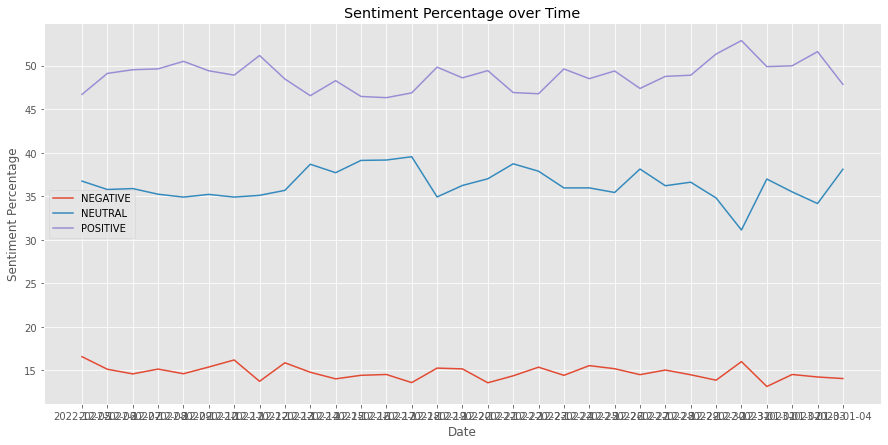

In [ ]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,7))
for sentiment in date_sentiment.columns:
    plt.plot(date_sentiment.index, date_sentiment[sentiment], label=sentiment)
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Percentage over Time')
plt.legend()
plt.show()


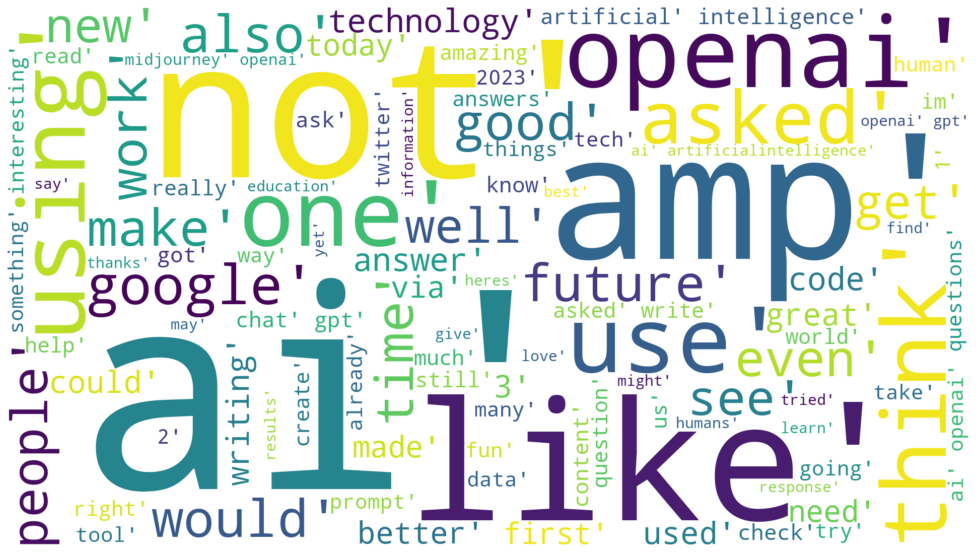

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

STOPWORDS = set(STOPWORDS).union({"new_word1", "new_word2"})

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['asked', 'one', 'incredible', 'facts', 'universe', 'watch', 'agile', 'teachers', 'lounge', 'amp', 'join', 'conversation', 'classroom', 'join', 'conversation', 'let', 'us', 'know', 'thoughts', 'edutwitter']


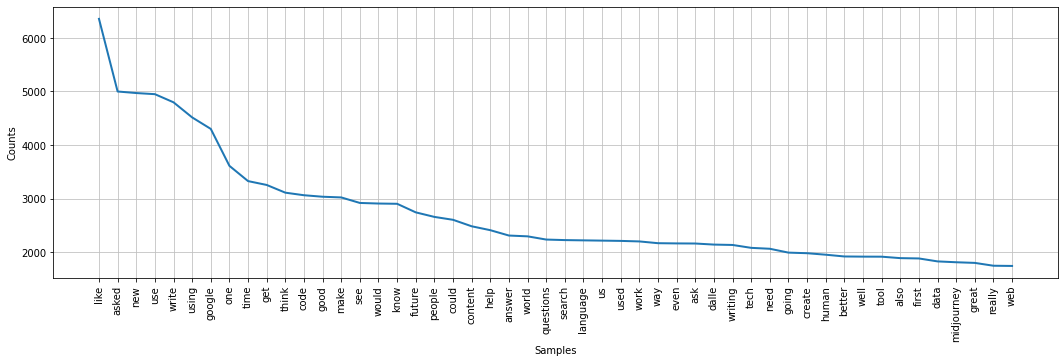

In [32]:
from nltk.probability import FreqDist
import re

# Join all the text in processed_df['processed_text']
all_text = " ".join(text for text in processed_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

stopwords = {"ai", "not", "openai", "im", "chatbot", "chat", "dont", "amp", "gpt", "artificialintelligence", "technology", "intelligence", "artificial" }
filtered_tokens = [token for token in tokens if token not in stopwords]

print(tokens[0:20])
# Generate the frequency distribution
fdist = FreqDist(filtered_tokens)

# Plot the frequency distribution
plt.figure(figsize=(18, 5))
fdist.plot(50, cumulative=False)
plt.show()


In [26]:
positive_df = processed_df[processed_df['sentiment_label'] == 'POSITIVE']
positive_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredib...,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n...",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18,['ChatGPT'],Twitter Web App,"['asked', '', 'one', 'incredible', 'facts', 'u...",POSITIVE,0.900000
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join th...,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover,...",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"['watch', 'agile', 'teachers', 'lounge', 'amp'...",POSITIVE,0.500000
2,Heart Selling,What is Heart Selling according to #ChatGPT.\n...,"Zeist, Nederland",In turbulent times: Make #friends! De Sales Ex...,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18,['ChatGPT'],Twitter for Android,"['heart', 'selling', 'according', '', 'not', '...",POSITIVE,0.143750
3,CryptoRock,@sulamatraore You should thanks to check out t...,NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18,NaN,Twitter Web App,"['thanks', 'check', 'website', 'great', 'colle...",POSITIVE,0.477778
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\...,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #N...,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18,"['ChatGPT', 'AIArtwork']",Twitter for Android,"['anything', 'real', 'original', 'anymore', ''...",POSITIVE,0.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84542,HailSquid,It's true!\nhttps://t.co/ng71DMdgaS\n#ChatGPT ...,NaN,Punk-inspired developer and nerd stickers by @...,2022-10-21 20:43:22+00:00,8.0,23.0,8.0,False,2022-12-05,NaN,Twitter for Android,"['true', '']",POSITIVE,0.350000
84545,Nick Perkins • Hebrews 13:8 • Development Manager,Ok now @OpenAI is just showing off. lol #ChatG...,"Raleigh, North Carolina, USA","A proud Dad of 3, husband, Dev manager, iOS en...",2013-12-04 17:12:00+00:00,164.0,326.0,6317.0,False,2022-12-05,"['OpenAI', 'ChatGPT']",Twitter Web App,"['ok', 'showing', 'lol', '']",POSITIVE,0.650000
84546,Nenu,"ChatGPT is the biggest, smartest brain 🧠 in th...",NaN,Your brain is not meant for processing million...,2022-08-30 14:33:29+00:00,6.0,87.0,738.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['', 'biggest', 'smartest', 'brain', 'world', ...",POSITIVE,0.285714
84547,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['levelsso', 'happy', '', 'team', 'com8ng', 'r...",POSITIVE,0.500000


In [27]:
positive_words = " ".join(review for review in positive_df["processed_text"])

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored

['asked', 'one', 'incredible', 'facts', 'universe', 'watch', 'agile', 'teachers', 'lounge', 'amp', 'join', 'conversation', 'classroom', 'join', 'conversation', 'let', 'us', 'know', 'thoughts', 'edutwitter']


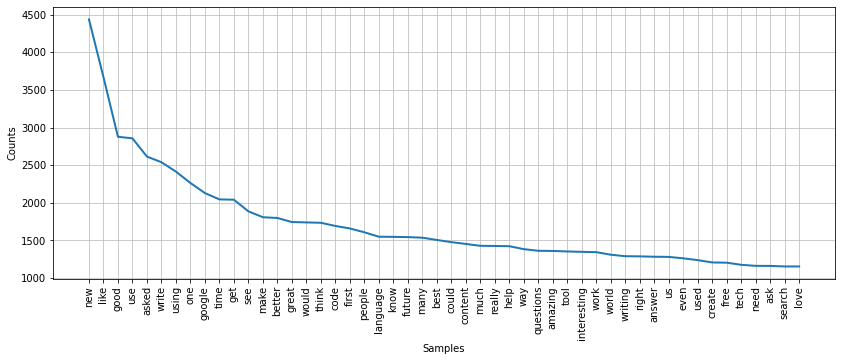

In [33]:
# Join all the text
all_text = " ".join(text for text in positive_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()
# Tokenize the text
tokens = nltk.word_tokenize(all_text)
print(tokens[0:20])

stopwords = {" ai", "ai", " ai ", " ai ", "not", "openai", "im", "chatbot", "chat", "dont", "amp", "gpt", "artificialintelligence", "technology", "intelligence", "artificial" }
filtered_tokens = [token for token in tokens if token not in stopwords]

# Generate the frequency distribution
fdist = FreqDist(filtered_tokens)

# Plot the frequency distribution
plt.figure(figsize=(14, 5))
fdist.plot(50, cumulative=False)
plt.show()


In [30]:
negative_df = processed_df[processed_df['sentiment_label'] == 'NEGATIVE']
negative_words = " ".join(review for review in negative_df["processed_text"])

# Create a string of all the words in the 'processed_text' column
text = " ".join(review for review in processed_df.processed_text)

# Create a word cloud with the text and set the background color to white
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, width=1920, height=1080, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: ignored

['everything', 'serious', 'online', 'business', 'owner', 'needs', 'longterm', 'growth', 'definitely', 'worth', 'taking', 'look', 'link', 'aiforbusiness', 'onlinebusinessowner', 'aichatbot', 'chathot', 'businessman', 'businessideas', 'businesswoman']


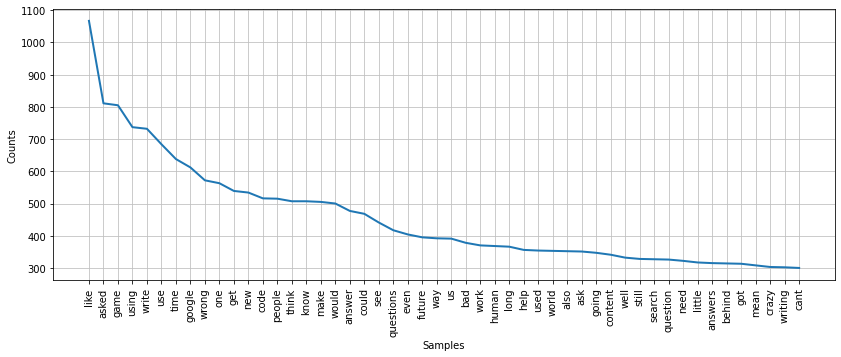

In [34]:
# Join all the text
all_text = " ".join(text for text in negative_df['processed_text'])
all_text = re.sub("[^a-zA-Z]", " ", all_text)
all_text = all_text.lower()

# Tokenize the text
tokens = nltk.word_tokenize(all_text)
print(tokens[0:20])

stopwords = {" ai", "ai", " ai ", " ai ", "not", "openai", "im", "chatbot", "chat", "dont", "amp", "gpt", "artificialintelligence", "technology", "intelligence", "artificial" }
filtered_tokens = [token for token in tokens if token not in stopwords]

# Generate the frequency distribution
fdist = FreqDist(filtered_tokens)

# Plot the frequency distribution
plt.figure(figsize=(14, 5))
fdist.plot(50, cumulative=False)
plt.show()

In [ ]:
# !pip install pycountry


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d124b700445bdf882ce8823f1f25acf8b3af3a20d22bf4e7788b1f3560ff44de
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [5]:
tech_keywords = ["ai", "machine learning", "tech", "it", "i.t.", "computer","programmer", "coder", "techie", "machine learning", "machine learning engineer", "data scientist", "data analyst", "data engineer", "AI", "artificial intelligence", "deep learning", "neural networks", "computer vision", "natural language processing", "big data", "cloud computing", "software developer", "web", "developer", "front-end", "back-end", "full-stack", "python", "r", "java", "c++", "javascript", "sql", "algorithms", "devops", "linux", "git", "agile", "scrum", "intern", "google", "microsoft", "amazon", "facebook", "apple", "open source", "hackathon", "startup", "entrepreneur", "research", "ph.d.", "masters", "bachelor", "engineer", "consultant", "analyst", "manager", "director", "lead", "senior", "junior", "summer of code", "github", "stack overflow", "kaggle", "coursera", "edx", "udemy", "codecademy", "khan academy", "mit opencourseware", "stanford online", "javascript", "python", "c++", "java", "php", "sql", "git", "linux", "windows", "mac", "devops", "agile", "scrum", "kanban", "software development", "full stack", "front-end", "back-end", "api", "data science", "big data", "data engineering", "data analyst", "data visualization", "neural networks", "deep learning", "computer vision", "natural language processing", "reinforcement", "learning", "computer science", "computer engineer", "software engineer", "programmer", "coder", "developer", "debugging", "code review", "algorithm", "data structure", "cloud computing", "aws", "azure", "google cloud", "ibm cloud", "oracle", "cloud", "open source", "docker", "kubernetes", "ai engineer", "machine learning engineer", "data engineer", "data scientist", "ai researcher"]


In [6]:
processed_df['user_description']

0        Space-YouTuber, Autor und Planetariumsführer\n...
1        Educational Agilist, #Teacher, #History Lover,...
2        In turbulent times: Make #friends! De Sales Ex...
3                                   💯💯💯💯 Follow Black 💯💯💯💯
4        #ProjectOctolite👾 #ShineYourLite✨️#Curating #N...
                               ...                        
84547    Blockchain Enthusiast || Philanthropist || a S...
84548                                                  NaN
84549    Mathematician and Developer @Amazon. Previousl...
84550    passionate by nature, software developer by pr...
84551    Postdoc in @GippLab at @uniGoettingen \nPh.D. ...
Name: user_description, Length: 84552, dtype: object

In [7]:
processed_df['user_description_processed'] = processed_df['user_description'].apply(lambda x: x if isinstance(x, str) else '')


In [8]:
def preprocess_text(text):
    text = text.lower() # convert to lowercase
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # remove emojis and other symbols
    text = text.split() # break into tokens
    return text

processed_df['user_description_processed'] = processed_df['user_description_processed'].apply(preprocess_text)


In [9]:
processed_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score,user_description_processed
0,Tim Julian Ruster,I asked ChatGPT about one of the most incredib...,"Köln, Deutschland","Space-YouTuber, Autor und Planetariumsführer\n...",2015-06-14 08:35:03+00:00,11512.0,24.0,2635.0,False,2022-12-18,['ChatGPT'],Twitter Web App,"['asked', 'chatgpt', 'one', 'incredible', 'fac...",POSITIVE,0.900000,"[spaceyoutuber, autor, und, planetariumsfhrer,..."
1,Jessica Cavallaro,Watch The #Agile Teachers Lounge &amp; join th...,"Delray Beach, FL","Educational Agilist, #Teacher, #History Lover,...",2015-10-02 13:23:34+00:00,372.0,685.0,2684.0,False,2022-12-18,"['Agile', 'ChatGPT', 'classroom']",Twitter for iPhone,"['watch', 'agile', 'teachers', 'lounge', 'amp'...",POSITIVE,0.500000,"[educational, agilist, teacher, history, lover..."
2,Heart Selling,What is Heart Selling according to #ChatGPT.\n...,"Zeist, Nederland",In turbulent times: Make #friends! De Sales Ex...,2010-12-17 13:06:12+00:00,42.0,8.0,78.0,False,2022-12-18,['ChatGPT'],Twitter for Android,"['heart', 'selling', 'according', 'chatgpt', '...",POSITIVE,0.143750,"[in, turbulent, times, make, friends, de, sale..."
3,CryptoRock,@sulamatraore You should thanks to check out t...,NaN,💯💯💯💯 Follow Black 💯💯💯💯,2022-06-29 08:37:05+00:00,835.0,964.0,193.0,False,2022-12-18,NaN,Twitter Web App,"['thanks', 'check', 'website', 'great', 'colle...",POSITIVE,0.477778,"[follow, black]"
4,Octo_Fam💫,@OpenAI is anything real or original anymore?\...,Coast of somewhere beautiful,#ProjectOctolite👾 #ShineYourLite✨️#Curating #N...,2021-11-16 16:03:30+00:00,1280.0,2494.0,13932.0,False,2022-12-18,"['ChatGPT', 'AIArtwork']",Twitter for Android,"['anything', 'real', 'original', 'anymore', 'c...",POSITIVE,0.562500,"[projectoctolite, shineyourlitecurating, nftar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84547,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['levelsso', 'happy', 'chatgpt', 'team', 'com8...",POSITIVE,0.500000,"[blockchain, enthusiast, philanthropist, a, sl..."
84548,Green,Iterating back-and-forth with tools like #Chat...,🍁,NaN,2022-12-03 12:49:13+00:00,3.0,33.0,3.0,False,2022-12-05,NaN,Twitter Web App,"['iterating', 'backandforth', 'tools', 'like',...",NEGATIVE,-0.133333,[]
84549,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it tak...,NaN,Mathematician and Developer @Amazon. Previousl...,2016-07-09 21:08:52+00:00,80.0,34.0,169.0,False,2022-12-05,"['OpenAI', 'ChatGPT']",Twitter for Android,"['russel', 'vs', 'chatgpt', 'also', 'funny', '...",POSITIVE,0.100000,"[mathematician, and, developer, amazon, previo..."
84550,Devang,Was just wondering is there any difference bet...,United States,"passionate by nature, software developer by pr...",2015-05-19 03:17:06+00:00,15.0,86.0,307.0,False,2022-12-05,"['ChatGPT', 'Bitcoin']",Twitter Web App,"['wondering', 'difference', 'jasper', 'chatgpt...",NEUTRAL,0.000000,"[passionate, by, nature, software, developer, ..."


In [10]:
tech_df = processed_df[processed_df['user_description_processed'].apply(lambda x: any(word in x for word in tech_keywords))]


In [11]:
tech_df

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,processed_text,sentiment_label,sentiment_score,user_description_processed
8,"Cybersécurité, IA, Metavers, Cryptomonnaies",GUARDIA CYBERSECURITY SCHOOL REJOINT LE CAMPUS...,Paris,Top 10 Influencers #insurtech / #cybersecurity...,2020-06-17 08:41:18+00:00,3057.0,154.0,9837.0,False,2022-12-18,"['cryptocurrencies', 'MachineLearning']",Semrush Social Media Tool,"['guardia', 'cybersecurity', 'school', 'rejoin...",NEUTRAL,0.000000,"[top, 10, influencers, insurtech, cybersecurit..."
14,"Brent A. Anders, Ph.D.",@roxannriskin @steve_p_uk Exactly. Prevention ...,"Kansas, USA & Yerevan, Armenia","Director at AUA, Author (https://t.co/9i2haDcv...",2011-01-15 17:02:47+00:00,103.0,26.0,564.0,False,2022-12-18,['AILiteracy'],Twitter Web App,"['exactly', 'prevention', 'much', 'better', 'u...",POSITIVE,0.287500,"[director, at, aua, author, instructor, focusi..."
20,Where's My Jetpack?,This entire thread was created using #ChatGPT.,"Toronto, Ontario","The technologies we were promised as kids, wha...",2013-02-11 18:14:25+00:00,3404.0,7.0,2101.0,False,2022-12-18,['ChatGPT'],Twitter Web App,"['entire', 'thread', 'created', 'using', 'chat...",NEUTRAL,0.000000,"[the, technologies, we, were, promised, as, ki..."
21,Where's My Jetpack?,"#CV stands for Computer Vision, a field of AI ...","Toronto, Ontario","The technologies we were promised as kids, wha...",2013-02-11 18:14:25+00:00,3404.0,7.0,2101.0,False,2022-12-18,['CV'],Twitter Web App,"['cv', 'stands', 'computer', 'vision', 'field'...",NEUTRAL,0.000000,"[the, technologies, we, were, promised, as, ki..."
22,Where's My Jetpack?,The future of #ChatGPT is likely to involve co...,"Toronto, Ontario","The technologies we were promised as kids, wha...",2013-02-11 18:14:25+00:00,3404.0,7.0,2101.0,False,2022-12-18,['ChatGPT'],Twitter Web App,"['future', 'chatgpt', 'likely', 'involve', 'co...",POSITIVE,0.045455,"[the, technologies, we, were, promised, as, ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84545,Nick Perkins • Hebrews 13:8 • Development Manager,Ok now @OpenAI is just showing off. lol #ChatG...,"Raleigh, North Carolina, USA","A proud Dad of 3, husband, Dev manager, iOS en...",2013-12-04 17:12:00+00:00,164.0,326.0,6317.0,False,2022-12-05,"['OpenAI', 'ChatGPT']",Twitter Web App,"['ok', 'showing', 'lol', 'chatgpt']",POSITIVE,0.650000,"[a, proud, dad, of, 3, husband, dev, manager, ..."
84546,Nenu,"ChatGPT is the biggest, smartest brain 🧠 in th...",NaN,Your brain is not meant for processing million...,2022-08-30 14:33:29+00:00,6.0,87.0,738.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['chatgpt', 'biggest', 'smartest', 'brain', 'w...",POSITIVE,0.285714,"[your, brain, is, not, meant, for, processing,..."
84547,(I)(AM)(T)(MOYO),"Levels🙏🙏🙏,so happy for the chatGPT team for co...",Satoshi Island,Blockchain Enthusiast || Philanthropist || a S...,2013-12-07 16:38:30+00:00,3419.0,4994.0,16659.0,False,2022-12-05,['ChatGPT'],Twitter for Android,"['levelsso', 'happy', 'chatgpt', 'team', 'com8...",POSITIVE,0.500000,"[blockchain, enthusiast, philanthropist, a, sl..."
84549,Gabriel Furstenheim,Russel vs ChatGPT. It's also funny that it tak...,NaN,Mathematician and Developer @Amazon. Previousl...,2016-07-09 21:08:52+00:00,80.0,34.0,169.0,False,2022-12-05,"['OpenAI', 'ChatGPT']",Twitter for Android,"['russel', 'vs', 'chatgpt', 'also', 'funny', '...",POSITIVE,0.100000,"[mathematician, and, developer, amazon, previo..."


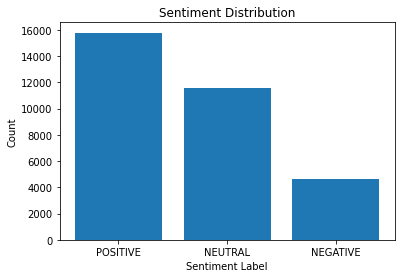

In [12]:
# Create a new DataFrame with the count of each sentiment label
sentiment_count = tech_df['sentiment_label'].value_counts().reset_index()
sentiment_count.columns = ['sentiment_label', 'count']

# Create the bar chart
plt.bar(sentiment_count['sentiment_label'], sentiment_count['count'])
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [13]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.graph_objects as go
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
sentiment_counts = tech_df['sentiment_label'].value_counts()
trace = go.Pie(labels=sentiment_counts.index, values=sentiment_counts, textinfo='label+value+percent')
layout = go.Layout(title="Sentiment Distribution - People in Tech", width=500, height=500)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
# Group the tweets by date
date_group_tech = tech_df.groupby(['date','sentiment_label']).size().reset_index(name='counts')
date_sentiment_tech = pd.pivot_table(date_group_tech, values='counts', index=['date'], columns=['sentiment_label'], aggfunc=np.sum, fill_value=0)
date_sentiment_tech = date_sentiment_tech.div(date_sentiment_tech.sum(axis=1), axis=0)*100



In [15]:
import plotly.graph_objects as go
pio.renderers.default = 'colab'
fig = go.Figure()
for sentiment in date_sentiment_tech.columns:
    fig.add_trace(go.Scatter(x=date_sentiment_tech.index, y=date_sentiment_tech[sentiment], name=sentiment))

fig.update_layout(title='Sentiment Percentage Trend - Tech',
                  xaxis_title='Date',
                  yaxis_title='Sentiment Percentage')

fig.show()

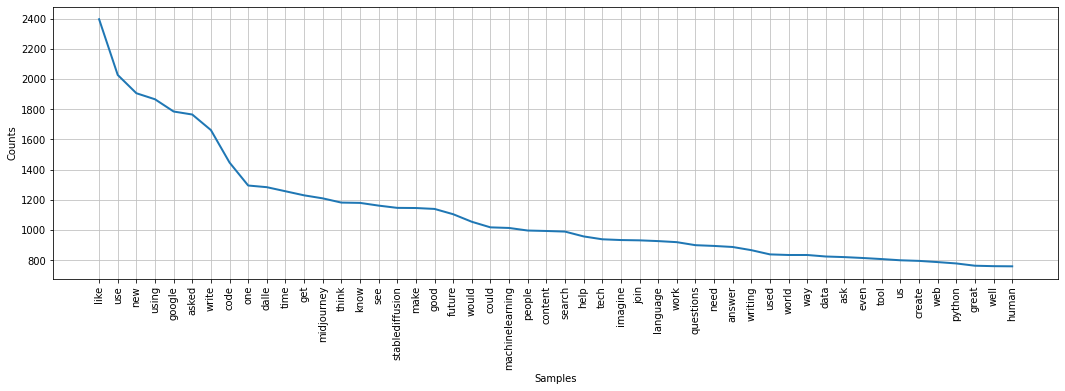

In [18]:
from nltk.probability import FreqDist
import re

# Join all the text in processed_df['processed_text']
all_text_tech = " ".join(text for text in tech_df['processed_text'])
all_text_tech = re.sub("[^a-zA-Z]", " ", all_text_tech)
all_text_tech = all_text_tech.lower()

# Tokenize the text
tokens = nltk.word_tokenize(all_text_tech)

stopwords = {"ai", "not", "openai", "im", "chatbot", "chat", "dont", "amp", "gpt", "artificialintelligence", "technology", "intelligence", "artificial", "chatgpt" }
filtered_tokens = [token for token in tokens if token not in stopwords]

# Generate the frequency distribution
fdist = FreqDist(filtered_tokens)

# Plot the frequency distribution
plt.figure(figsize=(18, 5))
fdist.plot(50, cumulative=False)
plt.show()

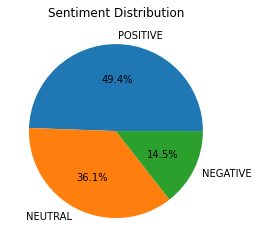

In [17]:
sentiment_counts = tech_df['sentiment_label'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%')
plt.title("Sentiment Distribution")

# Display the chart
plt.show()

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))



This error most likely means that this notebook is not configured to use a GPU.  Change this in Notebook Settings via the command palette (cmd/ctrl-shift-P) or the Edit menu.




SystemError: ignored